<a href="https://colab.research.google.com/github/djbrady/CNNprocessing/blob/main/rays/codeApertureImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Coded Aperture Imaging
###David Brady
### University of Arizona

Section 4.2 of **Computational Imaging**

### Python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist


## Coded aperture sampling function

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

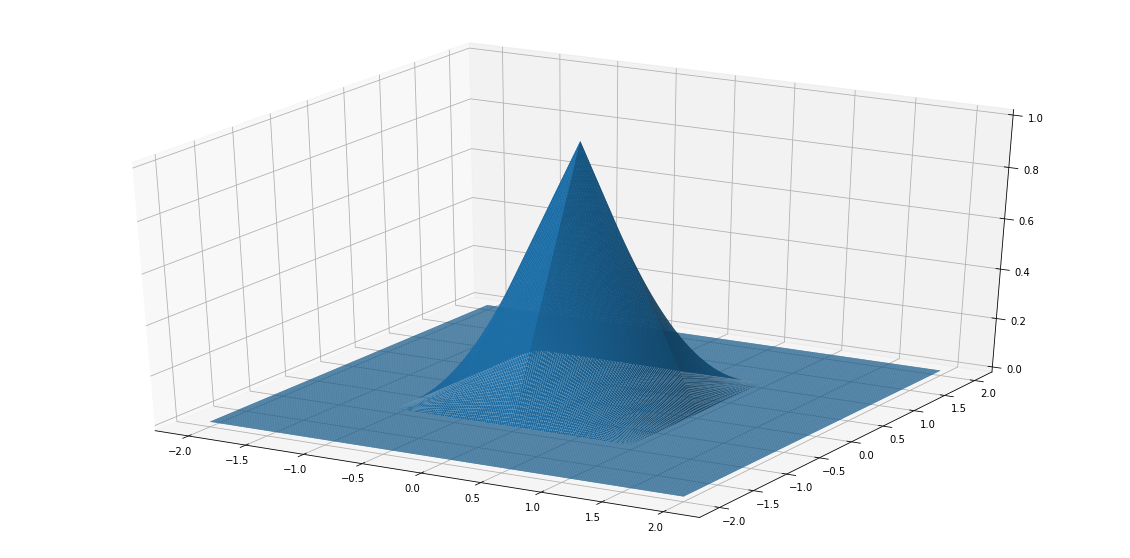

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
pixel=np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)]=1
sampFun=signal.convolve2d(pixel,pixel)
sampFun=sampFun/np.max(sampFun)
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))


surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)
#plt.savefig('muraCodedApertureSamplingFunction.pdf')
#files.download('muraCodedApertureSamplingFunction.pdf')


### Quadratic residues

In [2]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr


### Example Code patterns

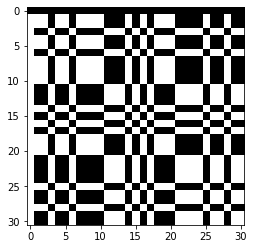

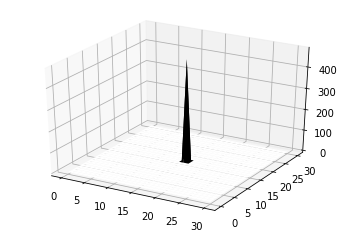

In [3]:

p=31
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
#plt.subplot(1,2,1);
plt.imshow(t,cmap='gray');
#plt.title('Base aperture pattern')
#plt.subplot(1,2,2);
#plt.imshow(tt, cmap='gray');
#plt.title('Tiled aperture pattern')
#plt.savefig('muraCodedAperture31.pdf')
#files.download('muraCodedAperture31.pdf')
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
#plt.title('Cross Corelation with Decoding Pattern')

#plt.savefig('muraCodedApertureCorrelation.pdf')
#files.download('muraCodedApertureCorrelation.pdf')



## Measuring and reconstructing images

In [ ]:
# load the mnist dataset of characters


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

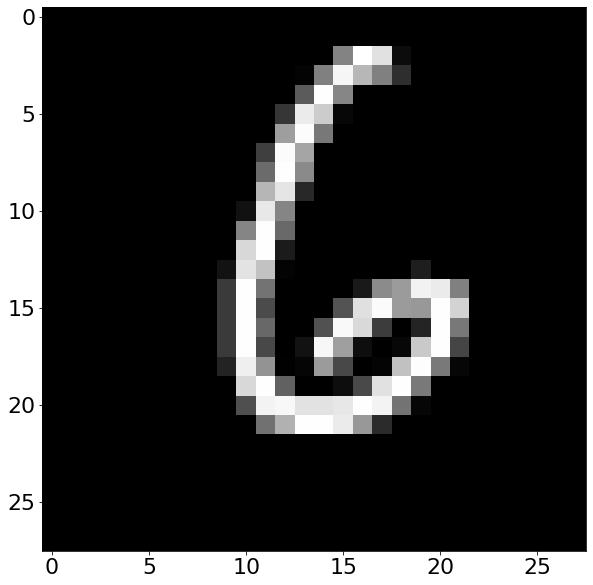

In [ ]:
plt.imshow(x_train[32],cmap='gray')

### Reconstruction with no noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

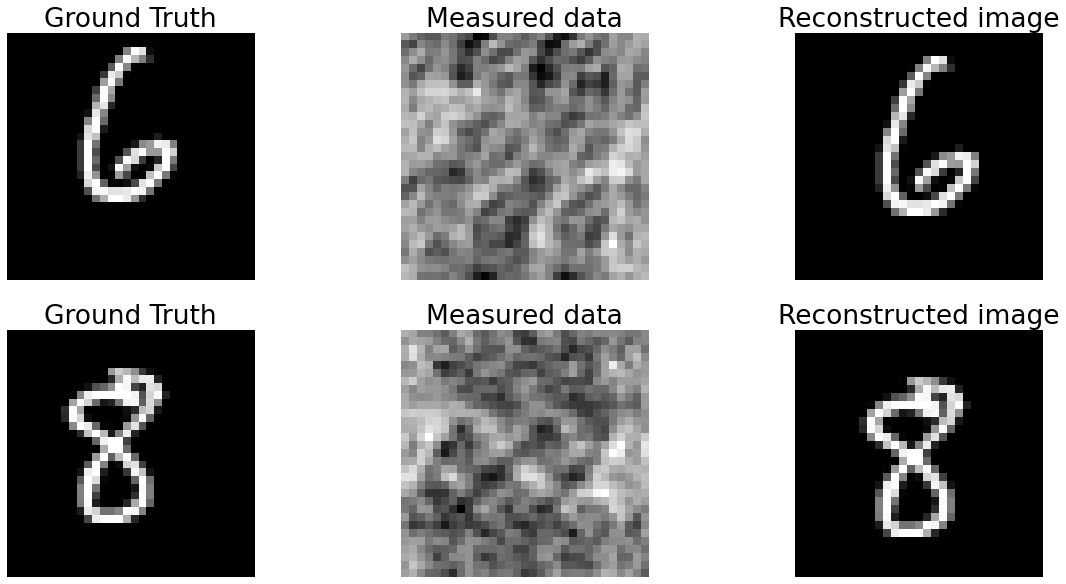

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[32];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[46];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

#plt.savefig('muraCodedApertureReconNoNoise.pdf')
#files.download('muraCodedApertureReconNoNoise.pdf')

            

In [ ]:
fe.shape

(31, 31)

### Reconstruction with poisson  noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

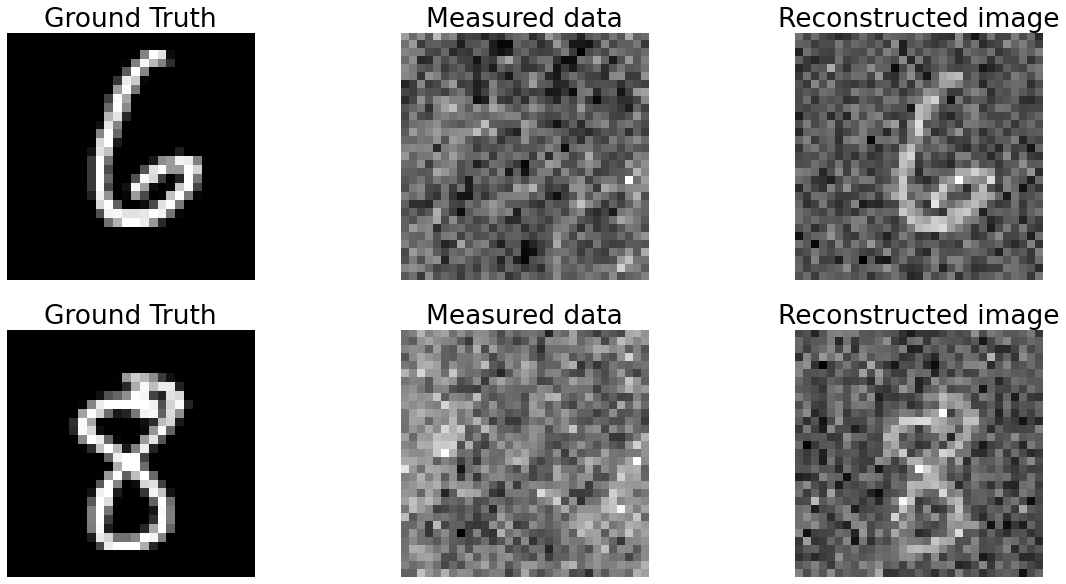

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[32];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[46];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

plt.savefig('muraCodedApertureReconShotNoise.pdf')
files.download('muraCodedApertureReconShotNoise.pdf')

            

# Neural denoising

## load and prepare data

In [4]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(28,28))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(28,28))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
g_train = np.reshape(g_train, (len(g_train), 28, 28, 1))
g_test = np.reshape(g_test, (len(g_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


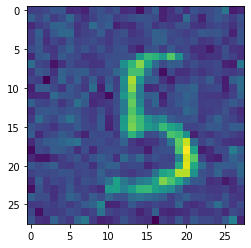

In [5]:
plt.imshow(g_test[1931].reshape(28, 28))

### Encoder/denoising model

we use a denoising model drawn from https://blog.keras.io/building-autoencoders-in-keras.html 

In [6]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

### Training

In [8]:

autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 159s 339ms/step - loss: 0.0777 - val_loss: 0.0769
Epoch 2/10
469/469 [==============================] - 160s 342ms/step - loss: 0.0774 - val_loss: 0.0768
Epoch 3/10
469/469 [==============================] - 163s 347ms/step - loss: 0.0771 - val_loss: 0.0764
Epoch 4/10
469/469 [==============================] - 162s 346ms/step - loss: 0.0769 - val_loss: 0.0766
Epoch 5/10
469/469 [==============================] - 162s 345ms/step - loss: 0.0767 - val_loss: 0.0760
Epoch 6/10
469/469 [==============================] - 162s 345ms/step - loss: 0.0765 - val_loss: 0.0759
Epoch 7/10
469/469 [==============================] - 162s 345ms/step - loss: 0.0763 - val_loss: 0.0757
Epoch 8/10
469/469 [==============================] - 162s 345ms/step - loss: 0.0762 - val_loss: 0.0756
Epoch 9/10
469/469 [==============================] - 162s 346ms/step - loss: 0.0760 - val_loss: 0.0755
Epoch 10/10
469/469 [==============================] - 159s 339m

### Examples of noisy and denoised images

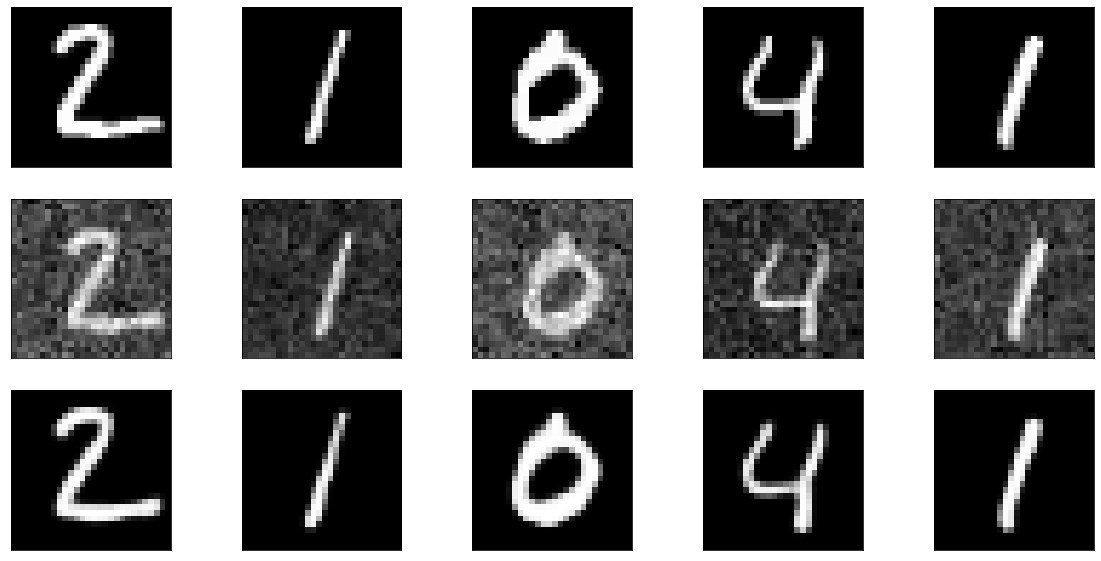

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [9]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.savefig('muraCodedApertureNeuralDenoise.pdf')
files.download('muraCodedApertureNeuralDenoise.pdf')

In [ ]:
!rm -r mistDenoiser/
autoencoder.save("mnistDenoiser")
!tar -czvf mnistDenoiser.tar.gz mnistDenoiser/
files.download('mnistDenoiser.tar.gz')

rm: cannot remove 'mistDenoiser/': No such file or directory
INFO:tensorflow:Assets written to: mnistDenoiser/assets
mnistDenoiser/
mnistDenoiser/variables/
mnistDenoiser/variables/variables.index
mnistDenoiser/variables/variables.data-00000-of-00001
mnistDenoiser/assets/
mnistDenoiser/keras_metadata.pb
mnistDenoiser/saved_model.pb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('mnistDenoiser.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>